In [8]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


In [15]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *




In [88]:
# Load data
df = pd.read_csv('data/sales_final.csv')

#sk.skim(df)

In [89]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


Item_Identifier              [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Weight                  [9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...
Item_Fat_Content                          [Low Fat, Regular, low fat, LF, reg]
Item_Visibility              [0.016047301, 0.019278216, 0.016760075, 0.0, 0...
Item_Type                    [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
Item_MRP                     [249.8092, 48.2692, 141.618, 182.095, 53.8614,...
Outlet_Identifier            [OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...
Outlet_Establishment_Year    [1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...
Outlet_Size                                         [Medium, nan, High, Small]
Outlet_Location_Type                                  [Tier 1, Tier 3, Tier 2]
Outlet_Type                  [Supermarket Type1, Supermarket Type2, Grocery...
Item_Outlet_Sales            [3735.138, 443.4228, 2097.27, 732.38, 994.7052...
dtype: object

In [31]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB
None


Item_Identifier              [FDA15, DRC01, FDN15, NCD19, FDP36, FDO10, FDP...
Item_Weight                  [9.3, 5.92, 17.5, 8.93, 10.395, 13.65, 12.6, 1...
Item_Fat_Content                          [Low Fat, Regular, low fat, reg, LF]
Item_Visibility              [0.016047301, 0.019278216, 0.016760075, 0.0, 0...
Item_Type                    [Dairy, Soft Drinks, Meat, Household, Baking G...
Item_MRP                     [249.8092, 48.2692, 141.618, 53.8614, 51.4008,...
Outlet_Identifier            [OUT049, OUT018, OUT013, OUT027, OUT046, OUT03...
Outlet_Establishment_Year                 [1999, 2009, 1987, 1985, 1997, 2004]
Outlet_Size                                              [Medium, High, Small]
Outlet_Location_Type                                  [Tier 1, Tier 3, Tier 2]
Outlet_Type                  [Supermarket Type1, Supermarket Type2, Superma...
Item_Outlet_Sales            [3735.138, 443.4228, 2097.27, 994.7052, 556.60...
dtype: object

In [91]:
df = pd.read_csv('data/sales_final.csv')

categorical_column1 = 'Item_Fat_Content'
categorical_column2 = 'Item_Type'

df = pd.get_dummies(df, columns=[categorical_column1, categorical_column2])
df = df.drop(['Item_Identifier','Outlet_Location_Type','Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size','Outlet_Type'], axis=1)

# Impute missing values using simple (CAT)
cols = df.columns
df[cols[1]].fillna(df[cols[1]].median(),inplace=True) # df.info COLUMN 2

df.dropna(inplace=True)

print(df)

      Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0           9.300         0.016047  249.8092          3735.1380   
1           5.920         0.019278   48.2692           443.4228   
2          17.500         0.016760  141.6180          2097.2700   
3          19.200         0.000000  182.0950           732.3800   
4           8.930         0.000000   53.8614           994.7052   
...           ...              ...       ...                ...   
8518        6.865         0.056783  214.5218          2778.3834   
8519        8.380         0.046982  108.1570           549.2850   
8520       10.600         0.035186   85.1224          1193.1136   
8521        7.210         0.145221  103.1332          1845.5976   
8522       14.800         0.044878   75.4670           765.6700   

      Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                   False                      True                     False   
1                   False        

In [92]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 7060 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      7060 non-null   float64
 1   Item_Visibility                  7060 non-null   float64
 2   Item_MRP                         7060 non-null   float64
 3   Item_Outlet_Sales                7060 non-null   float64
 4   Item_Fat_Content_LF              7060 non-null   bool   
 5   Item_Fat_Content_Low Fat         7060 non-null   bool   
 6   Item_Fat_Content_Regular         7060 non-null   bool   
 7   Item_Fat_Content_low fat         7060 non-null   bool   
 8   Item_Fat_Content_reg             7060 non-null   bool   
 9   Item_Type_Baking Goods           7060 non-null   bool   
 10  Item_Type_Breads                 7060 non-null   bool   
 11  Item_Type_Breakfast              7060 non-null   bool   
 12  Item_Type_Canned         

Item_Weight                        [9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...
Item_Visibility                    [0.016047301, 0.019278216, 0.016760075, 0.0, 0...
Item_MRP                           [249.8092, 48.2692, 141.618, 182.095, 53.8614,...
Item_Outlet_Sales                  [3735.138, 443.4228, 2097.27, 732.38, 994.7052...
Item_Fat_Content_LF                                                    [False, True]
Item_Fat_Content_Low Fat                                               [True, False]
Item_Fat_Content_Regular                                               [False, True]
Item_Fat_Content_low fat                                               [False, True]
Item_Fat_Content_reg                                                   [False, True]
Item_Type_Baking Goods                                                 [False, True]
Item_Type_Breads                                                       [False, True]
Item_Type_Breakfast                                              

In [93]:
df = df.drop(['Item_MRP','Item_Visibility','Item_Type_Others'], axis=1)

# Create a list of columns to sum
columns_to_sum = ['Item_Fat_Content_Low Fat',
                  'Item_Fat_Content_Regular',
                  'Item_Fat_Content_low fat',
                  'Item_Fat_Content_reg',
                  'Item_Type_Baking Goods',
                  'Item_Type_Breads',
                  'Item_Type_Breakfast',
                  'Item_Type_Canned',
                  'Item_Type_Dairy',
                  'Item_Type_Frozen Foods',
                  'Item_Type_Fruits and Vegetables',
                  'Item_Type_Hard Drinks',
                  'Item_Type_Health and Hygiene',
                  'Item_Type_Household',
                  'Item_Type_Meat',
                  'Item_Type_Seafood',
                  'Item_Type_Snack Foods',
                  'Item_Type_Soft Drinks',
                  'Item_Type_Starchy Foods']

# Sum the values in the specified columns
true_count = df[columns_to_sum].sum()

print(true_count)

Item_Fat_Content_Low Fat           4222
Item_Fat_Content_Regular           2388
Item_Fat_Content_low fat             84
Item_Fat_Content_reg                106
Item_Type_Baking Goods              536
Item_Type_Breads                    204
Item_Type_Breakfast                  89
Item_Type_Canned                    539
Item_Type_Dairy                     566
Item_Type_Frozen Foods              718
Item_Type_Fruits and Vegetables    1019
Item_Type_Hard Drinks               183
Item_Type_Health and Hygiene        430
Item_Type_Household                 759
Item_Type_Meat                      337
Item_Type_Seafood                    51
Item_Type_Snack Foods               988
Item_Type_Soft Drinks               374
Item_Type_Starchy Foods             130
dtype: int64


In [94]:
columns_to_keep = ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Fruits and Vegetables','Item_Type_Snack Foods','Item_Outlet_Sales']

# Create a new DataFrame with only the selected columns
new_df = df.loc[:, columns_to_keep]

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

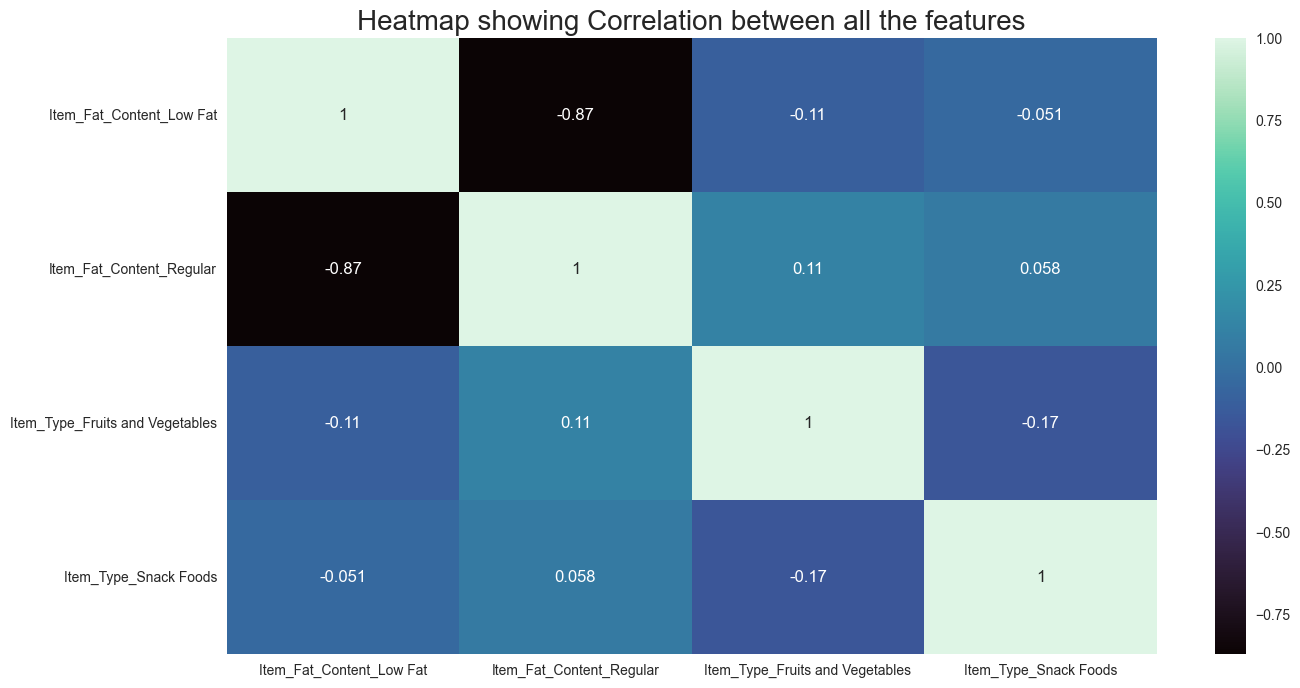

In [87]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(new_df.corr(),annot = True, cmap='mako')

In [97]:
# Split data into training and testing sets
X =new_df.drop(['Item_Outlet_Sales'], axis=1)
y = new_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [99]:
l_reg=LinearRegression()
l_reg.fit(X,y)
l_reg_pre=l_reg.predict(X)
lr_mse = mean_squared_error(y, l_reg_pre)
lr_r2 = r2_score(y, l_reg_pre)
score_linear=l_reg.score(X,l_reg_pre)
print(lr_mse)
print(lr_r2)
print(score_linear)

2347699.9389688885
0.0014559605342532311
1.0


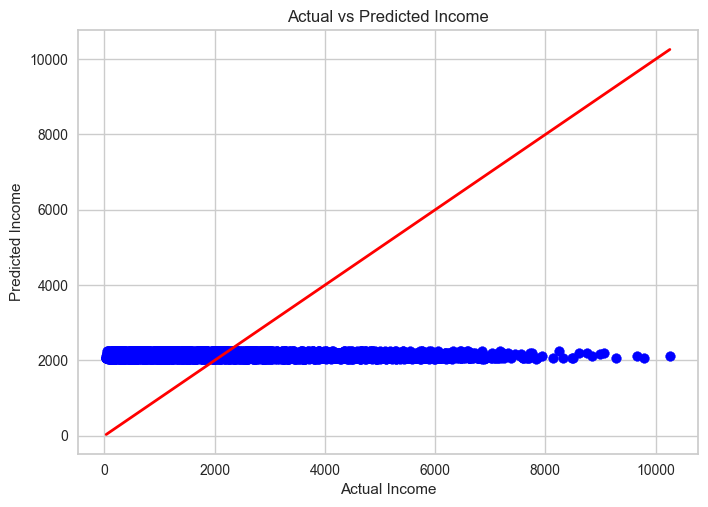

In [101]:
#Predict the values
y_pred = l_reg.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income')
plt.show()